### RNN

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Input, Dense, SimpleRNN, Dropout

from sklearn.preprocessing import MinMaxScaler

plt.rcParams["figure.figsize"] = (20, 8)

In [2]:
df = pd.read_csv("power_usage_2016_to_2020.csv")
df

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday
...,...,...,...,...
35947,2020-07-07 19:00:00,1.307,1,weekday
35948,2020-07-07 20:00:00,2.872,1,weekday
35949,2020-07-07 21:00:00,2.138,1,weekday
35950,2020-07-07 22:00:00,2.199,1,weekday


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StartDate    35952 non-null  object 
 1   Value (kWh)  35952 non-null  float64
 2   day_of_week  35952 non-null  int64  
 3   notes        35952 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [6]:
# Preprocesamiento

datos = df.drop(["StartDate", "day_of_week", "notes"], axis = 1)

scaler = MinMaxScaler()
datos = scaler.fit_transform(datos)

datos.shape

(35952, 1)

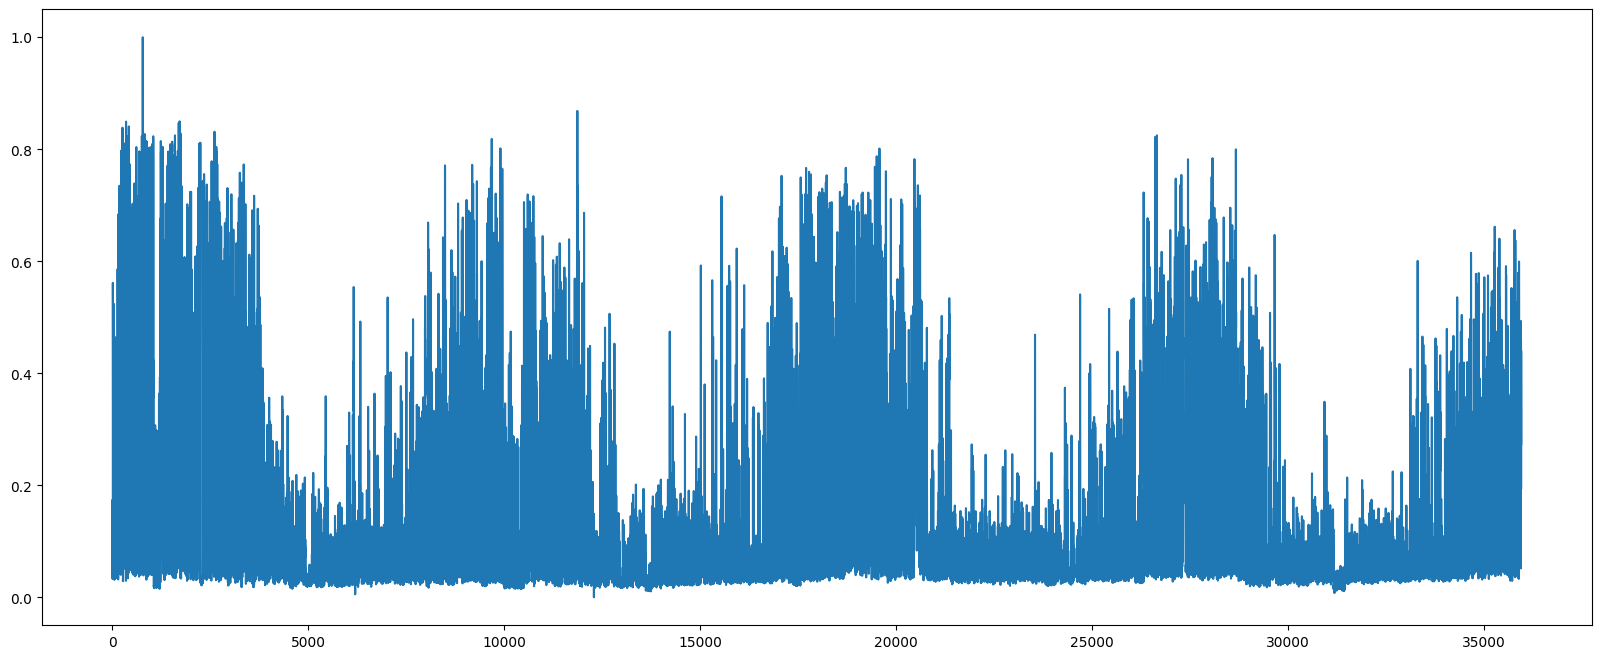

In [8]:
plt.plot(datos)
plt.show()

In [9]:
df["Year"] = df["StartDate"].map(lambda x : x[:4]) # obtenemos la columna año
df.head()

,StartDate,Value (kWh),day_of_week,notes,Year
0,2016-01-06 00:00:00,1.057,2,weekday,2016
1,2016-01-06 01:00:00,1.171,2,weekday,2016
2,2016-01-06 02:00:00,0.560,2,weekday,2016
3,2016-01-06 03:00:00,0.828,2,weekday,2016
4,2016-01-06 04:00:00,0.932,2,weekday,2016


In [10]:
df = df[df["Year"] == "2019"] #Filtramos por el año 2019
df.reset_index(drop = True, inplace = True)
df

,StartDate,Value (kWh),day_of_week,notes,Year
0,2019-01-01 00:00:00,0.574,1,weekday,2019
1,2019-01-01 01:00:00,0.677,1,weekday,2019
2,2019-01-01 02:00:00,0.523,1,weekday,2019
3,2019-01-01 03:00:00,0.480,1,weekday,2019
4,2019-01-01 04:00:00,0.473,1,weekday,2019
...,...,...,...,...,...
8755,2019-12-31 19:00:00,0.302,1,vacation,2019
8756,2019-12-31 20:00:00,0.334,1,vacation,2019
8757,2019-12-31 21:00:00,0.325,1,vacation,2019
8758,2019-12-31 22:00:00,0.407,1,vacation,2019


In [11]:
# Preprocesamiento

datos = df.drop(["StartDate", "day_of_week", "notes", "Year"], axis = 1)

scaler = MinMaxScaler()
datos = scaler.fit_transform(datos)

datos.shape

(8760, 1)

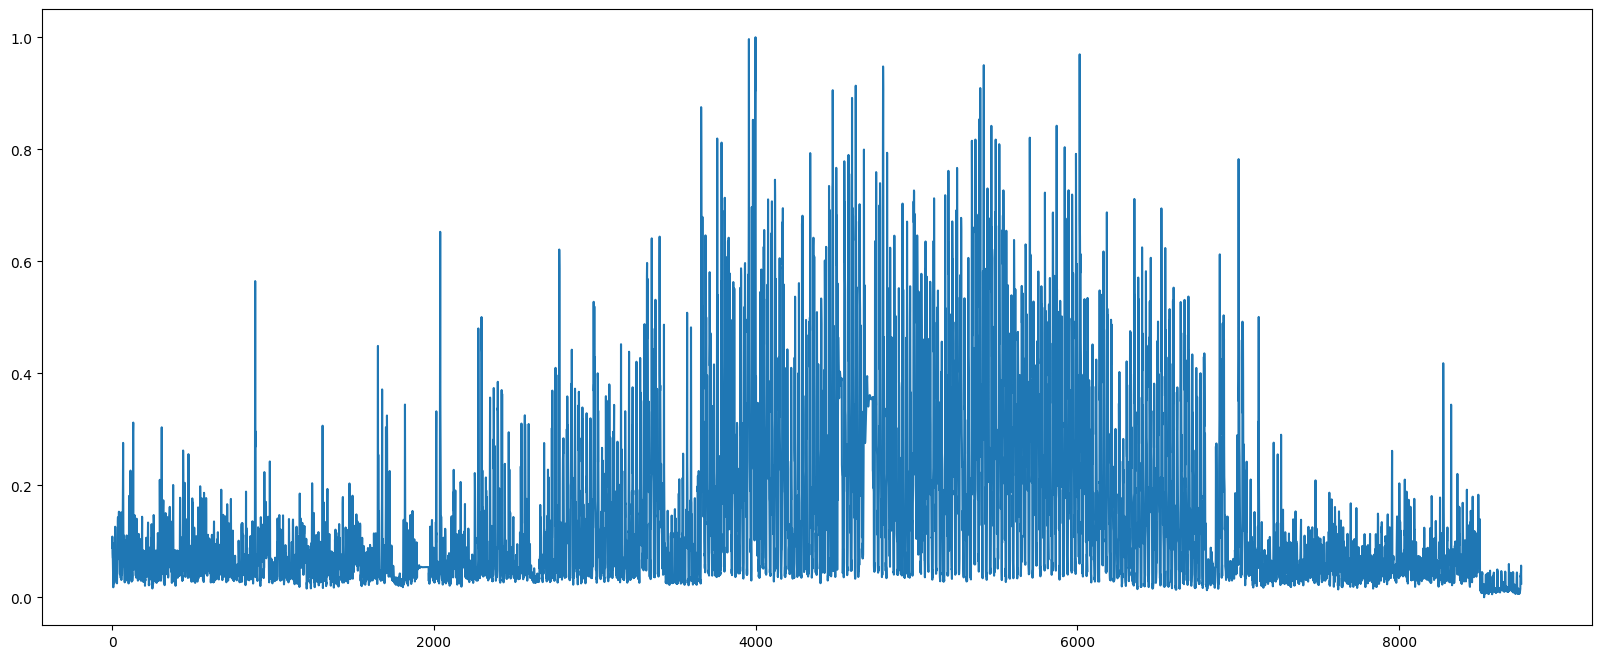

In [12]:
plt.plot(datos)
plt.show()

In [13]:
df["day_month"] = df["StartDate"].map(lambda x : x[5: 10]).values
df.head(30)

C:\Users\Aa\AppData\Local\Temp\ipykernel_28140\4063572425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day_month"] = df["StartDate"].map(lambda x : x[5: 10]).values


,StartDate,Value (kWh),day_of_week,notes,Year,day_month
0,2019-01-01 00:00:00,0.574,1,weekday,2019,01-01
1,2019-01-01 01:00:00,0.677,1,weekday,2019,01-01
2,2019-01-01 02:00:00,0.523,1,weekday,2019,01-01
3,2019-01-01 03:00:00,0.480,1,weekday,2019,01-01
4,2019-01-01 04:00:00,0.473,1,weekday,2019,01-01
5,2019-01-01 05:00:00,0.385,1,weekday,2019,01-01
6,2019-01-01 06:00:00,0.289,1,weekday,2019,01-01
7,2019-01-01 07:00:00,0.205,1,weekday,2019,01-01
8,2019-01-01 08:00:00,0.327,1,weekday,2019,01-01
9,2019-01-01 09:00:00,0.616,1,weekday,2019,01-01


In [14]:
datos = df.groupby("day_month")["Value (kWh)"].sum().values
datos

array([10.4       ,  8.74      , 10.751     , 10.626     , 20.794     ,
       14.061     , 31.134     , 33.01      , 33.782     , 27.449     ,
        9.734     , 11.846     , 12.397     , 12.872     , 12.968     ,
       11.409     ,  8.96      , 11.314     , 13.295     , 16.168     ,
       12.462     ,  9.369     , 13.104     , 11.99      , 13.06      ,
       11.29      ,  9.97      , 10.29      , 12.292     , 12.368     ,
       11.036     , 12.23      ,  8.803     , 10.23      , 10.717     ,
       19.174     , 38.364     , 27.385     , 34.988     , 42.027     ,
       29.706     ,  9.968     , 10.598     , 11.159     ,  9.254     ,
        9.339     , 10.539     ,  8.253     , 13.322     , 12.799     ,
       10.107     , 10.638     ,  9.2       ,  8.822     , 12.239     ,
       11.015     ,  9.534     ,  9.623     , 10.262     , 13.451     ,
       10.539     , 12.125     ,  8.662     , 14.609     , 34.014     ,
       25.363     , 25.433     , 37.499     , 21.045     , 10.59

In [15]:
scaler = MinMaxScaler()

datos = scaler.fit_transform(datos.reshape(-1, 1))

datos.shape

(365, 1)

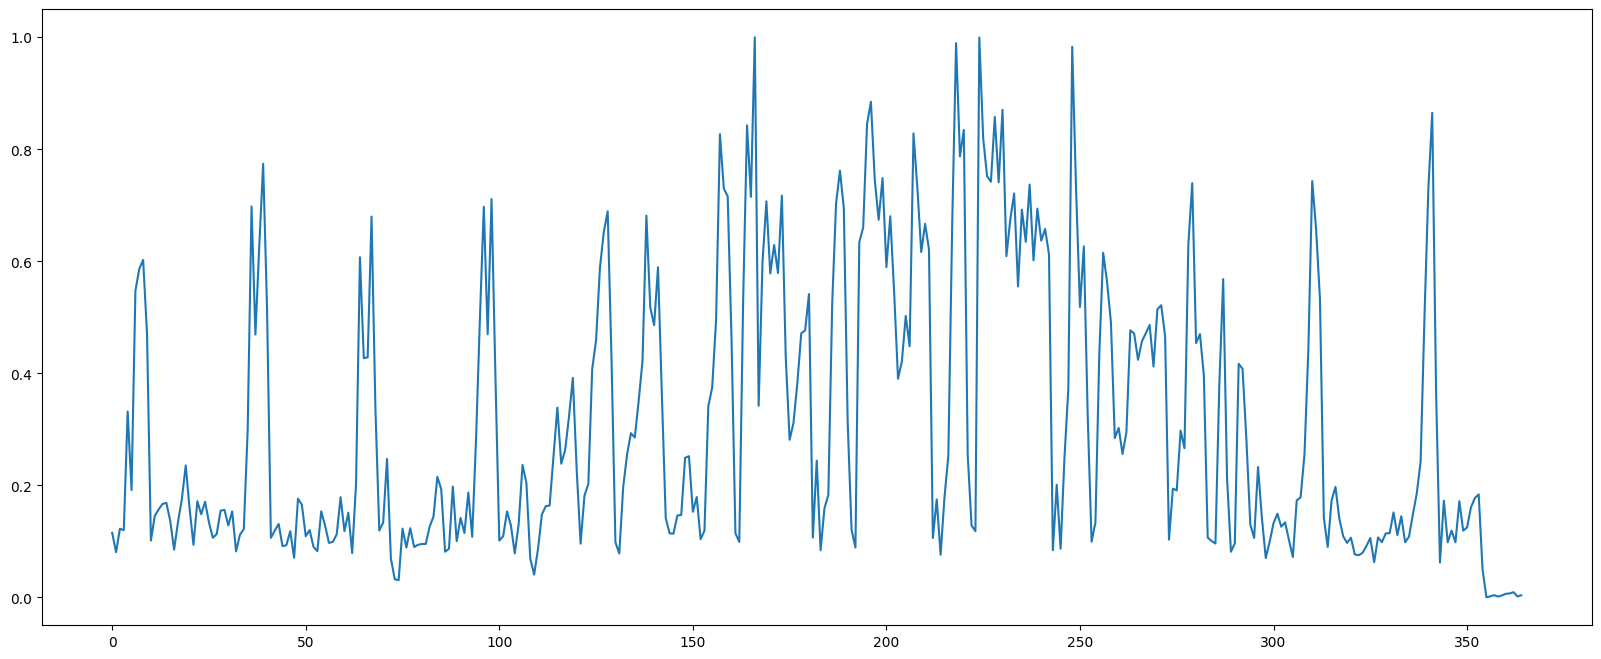

In [16]:
plt.plot(datos)
plt.show()

In [17]:
T = 20 # Segmentos
X = list()
y = list()

for t in range(len(datos) - T):
    
    # Toma valores de X de t en t con stride de 1
    x = datos[t : t + T]
    X.append(x)
    
    # Toma los valores de t en t
    y_ = datos[t + T]
    y.append(y_)

# Transformamos a np.array y ajustamos las dimensiones
# Para entrar en el modelo debe de tener 3 dimensiones
X = np.array(X).reshape(-1, T, 1)
y = np.array(y)
N = len(X)

print(f"X: {X.shape}\ty: {y.shape}")

X: (345, 20, 1)	y: (345, 1)


In [18]:
model = Sequential()

model.add(Input(shape = (T, 1)))

model.add(SimpleRNN(units = 200, activation = "relu"))

model.add(Dense(units = 60, activation="relu")) 
model.add(Dense(units = 30, activation="relu")) 
model.add(Dense(units = 15, activation="relu")) 
model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mse")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 200)               40400     
                                                                 
 dense (Dense)               (None, 60)                12060     
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 54771 (213.95 KB)
Trainable params: 54771 (213.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history = model.fit(x = X[:-N//2],
                    y = y[:-N//2],
                    validation_data = (X[-N//2:], y[-N//2:]),
                    epochs = 100)

Epoch 1/100
6/6 [==============================] - 1s 50ms/step - loss: 0.0794 - val_loss: 0.0665
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0479 - val_loss: 0.0643
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0386 - val_loss: 0.0425
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0336 - val_loss: 0.0387
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0281 - val_loss: 0.0395
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0260 - val_loss: 0.0341
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0231 - val_loss: 0.0325
Epoch 8/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0216 - val_loss: 0.0309
Epoch 9/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0210 - val_loss: 0.0297
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0191 - val_loss: 0.0314
Epoch 11/100
6/6 [=

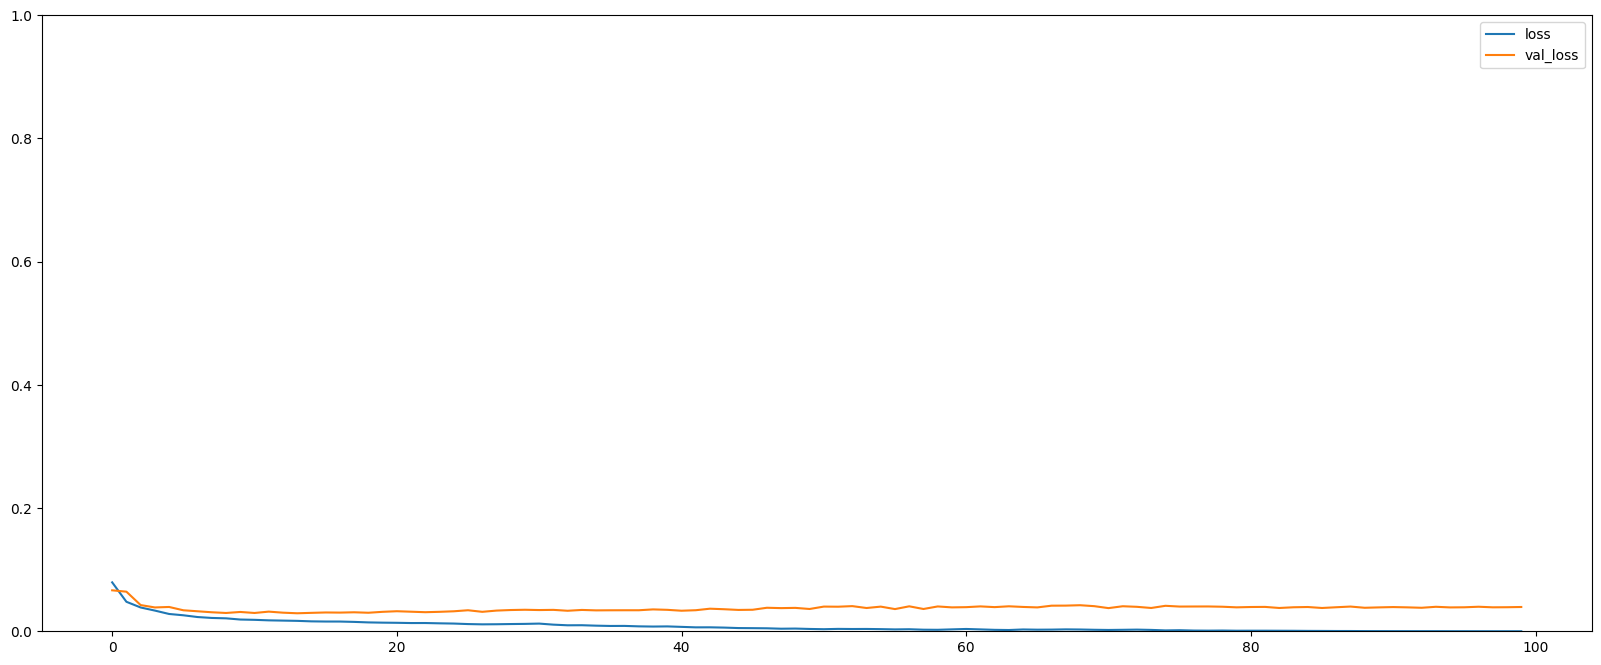

In [20]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.ylim(0, 1)
plt.show()

### Predicciones

In [21]:
# "1 - Step Predictions"

# Toma un valor y predice el siguiente

validation_target = y[-N//2:]
validation_predictions = list()

i = -N//2

while len(validation_predictions) < len(validation_target):
    
    # Predice el siguiente valor de X[i]
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0]
    i += 1
    
    validation_predictions.append(p)


1/1 [==============================] - 0s 16ms/step


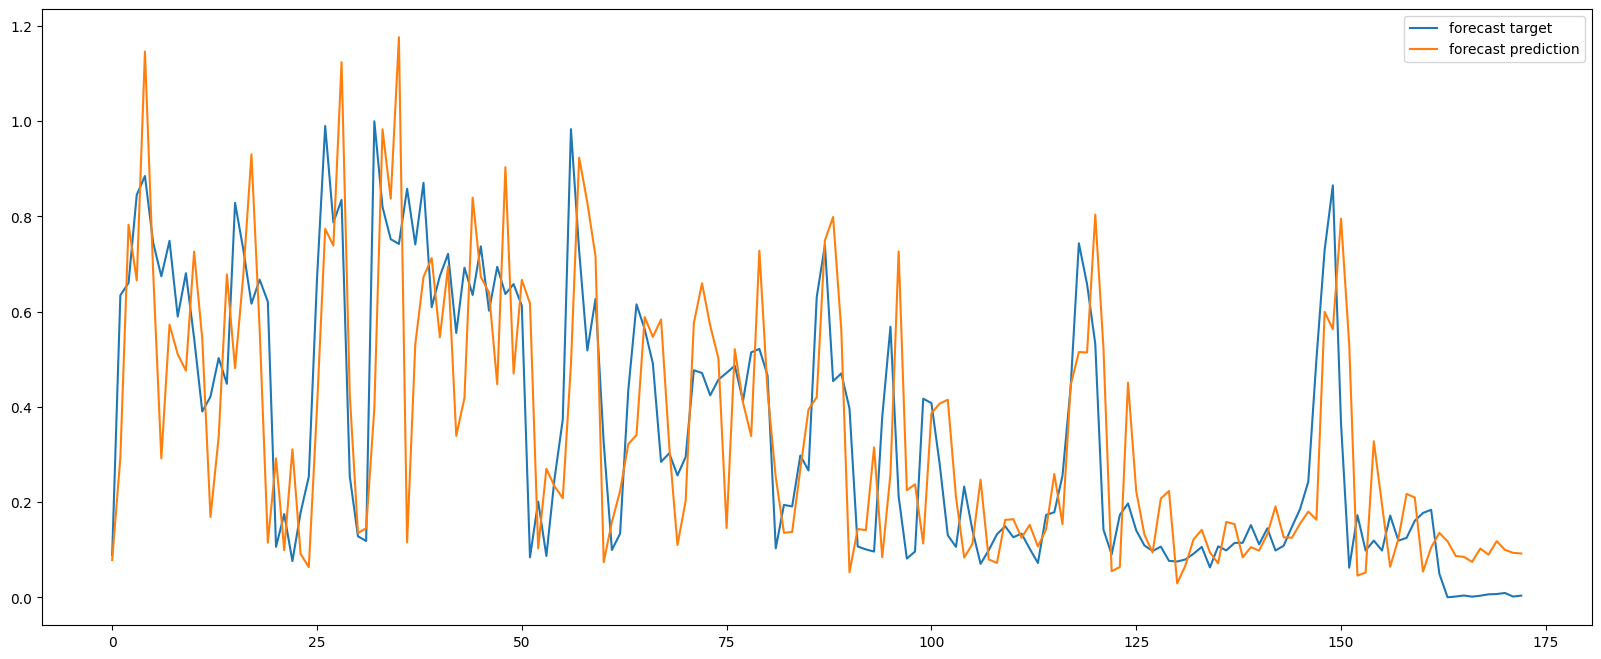

In [22]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()

In [23]:
# "Multiple - Step Predictions"

# Toma el último valor de una serie y predice el siguiente
# Usa esa predicción para seguir haciendo predicciones.

validation_target = y[-N//2:]
validation_predictions = list()

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    
    # En la primera iteración predice el siguiente valor de usando X
    # En las siguientes iteraciones usa el valor predicho anterior para predecir el siguiente
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0]
    
    validation_predictions.append(p)
    print(f"Valor: {last_x[-1][0]}\tPredicción: {p}")
    # Desplaza los elementos en last_x hacia atras, dejando el primer elemento al final
    last_x = np.roll(last_x, -1)
    
    # Cambia el último elemento a la predicción
    last_x[-1] = p

1/1 [==============================] - 0s 15ms/step
Valor: 0.12067025134425408	Predicción: 0.07823900133371353
1/1 [==============================] - 0s 15ms/step
Valor: 0.07823900133371353	Predicción: 0.2857852280139923
1/1 [==============================] - 0s 14ms/step
Valor: 0.2857852280139923	Predicción: 0.3609413206577301
1/1 [==============================] - 0s 14ms/step
Valor: 0.3609413206577301	Predicción: 0.3628157377243042
1/1 [==============================] - 0s 15ms/step
Valor: 0.3628157377243042	Predicción: 0.48101702332496643
1/1 [==============================] - 0s 15ms/step
Valor: 0.48101702332496643	Predicción: 0.290580153465271
1/1 [==============================] - 0s 15ms/step
Valor: 0.290580153465271	Predicción: 0.32532137632369995
1/1 [==============================] - 0s 16ms/step
Valor: 0.32532137632369995	Predicción: 0.596241295337677
1/1 [==============================] - 0s 15ms/step
Valor: 0.596241295337677	Predicción: 0.5161768198013306
1/1 [===========

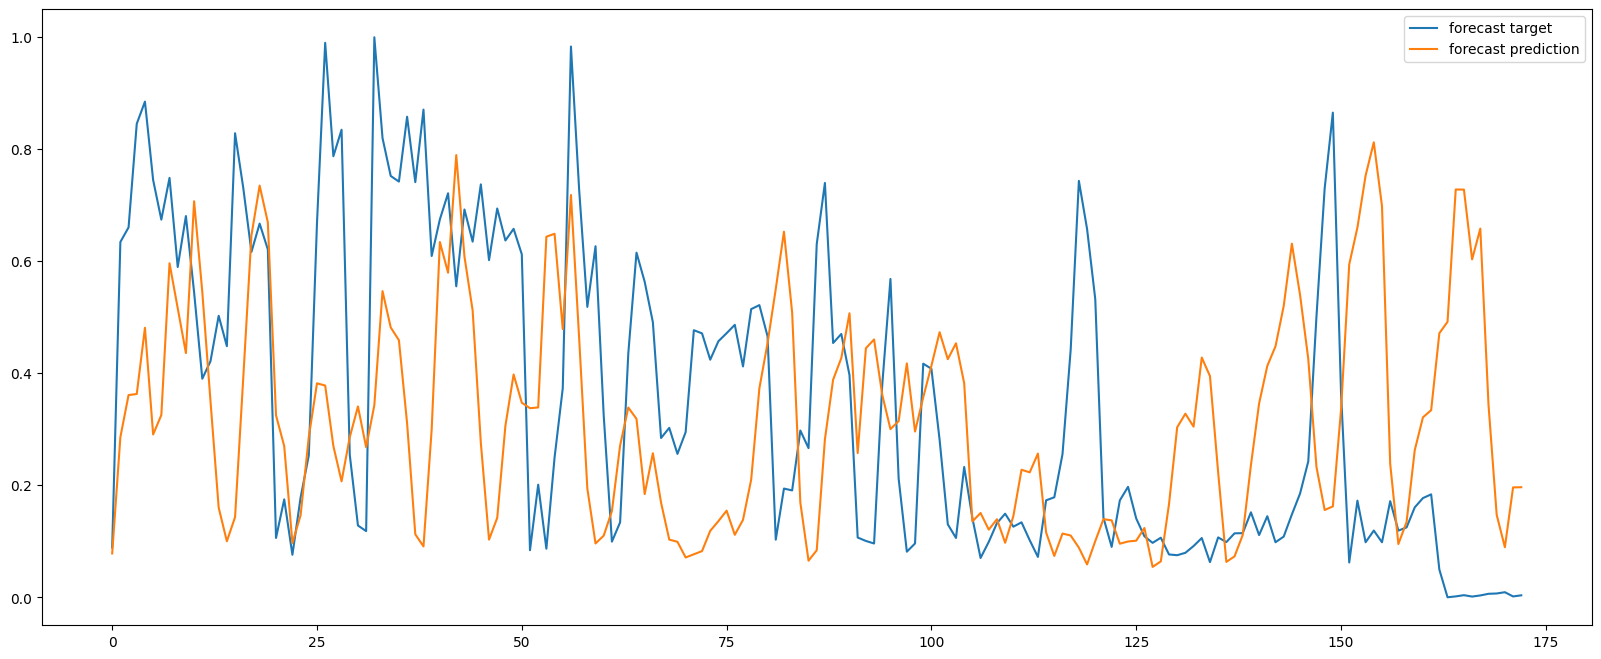

In [24]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()

In [ ]:
################################################################################################################################